# Environment Preparation

## Imports

In [28]:
import pandas as pd
import numpy as np
import cross_validation as cv
import random
from IPython.core.display   import HTML

from tabulate import tabulate
from cross_validation import runCrossValidation
from sklearn import neighbors as nh

## Path Handlers

In [29]:
datapath = '../data/'
display( HTML( '<style>.container { width:100% !important; }</style>') )

 # Load data

In [30]:
#train
x_train = pd.read_csv(datapath+'x_train.csv', index_col=0)
y_train = pd.read_csv(datapath+'y_train.csv', index_col=0)

#validation
x_val = pd.read_csv(datapath+'x_val.csv', index_col=0)
y_val = pd.read_csv(datapath+'y_val.csv', index_col=0)

# KNN Cross Validation

Run 2 KNN models with random hyperparameter setups, and perform a cross-validation on each one, with 10 different cuts in the data, to get the best setup possible.

In [20]:
## session with high processing time: 11h 29m (max_eval = 2, n_splits = 10)
## results compiled in the following table

param = {
    'n_neighbors':  [2, 5, 8], 
    'weights':  ['uniform', 'distance'], 
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 40],
    'p': [1,2]
}

max_eval = 2

for i in range(max_eval):
    # random choice of dictionary values
    hp = {k: random.sample(v,1)[0] for k, v in param.items()}
    print(hp)

    # model definition
    knn_model = nh.KNeighborsClassifier(n_neighbors=hp['n_neighbors'],
                                               weights = hp['weights'],
                                               algorithm=hp['algorithm'],
                                               leaf_size = hp['leaf_size'], 
                                               p =hp['p'], 
                                               n_jobs= -1)
    
    
    display(cv.runCrossValidation(knn_model, x_train, x_val, y_train, y_val, n_splits = 10, n_repeats = 2, top_k = 12200))

{'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 40, 'p': 2}


/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expe

,mean,std
precision_at_k,0.263053,0.001595
recall_at_k,0.858823,0.005240


{'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 20, 'p': 2}


/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expe

,mean,std
precision_at_k,0.185357,0.002291
recall_at_k,0.605157,0.007523


Results of the 2 models and their hyperparameters

In [23]:
final_results = {'model':['#1', '#2'],
                 'precision_at_k': ['0.263053 +/- 0.001595',
                                    '0.185357 +/- 0.002291'],
                 'recall_at_k': ['0.858823 +/- 0.005240',
                                 '0.605157 +/- 0.007523'],
                 'parameters': ["'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 40, 'p': 2",   
                                "'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 20, 'p': 2"]
                }

print(tabulate(final_results, headers=['model','precision@k','recall@k', 'hyperparameters'], tablefmt="fancy_grid"))

╒═════════╤═══════════════════════╤═══════════════════════╤════════════════════════════════════════════════════════════════════════════════════════╕
│ model   │ precision@k           │ recall@k              │ hyperparameters                                                                        │
╞═════════╪═══════════════════════╪═══════════════════════╪════════════════════════════════════════════════════════════════════════════════════════╡
│ #1      │ 0.263053 +/- 0.001595 │ 0.858823 +/- 0.005240 │ 'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 40, 'p': 2 │
├─────────┼───────────────────────┼───────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ #2      │ 0.185357 +/- 0.002291 │ 0.605157 +/- 0.007523 │ 'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 20, 'p': 2 │
╘═════════╧═══════════════════════╧═══════════════════════╧═══════════════════════════════════════════════

The results of the models varied, and the best performer in precision@k and racall@k was the number #2

# Model training and ranked list export

Train, plot gain and lift curves, and metrics of precision@k and recall@k of number #2

In [31]:
# model definition
knn_model = nh.KNeighborsClassifier(n_neighbors=8,
                                           weights = 'distance',
                                           algorithm='brute',
                                           leaf_size = 20, 
                                           p = 2, 
                                           n_jobs= -1)

# model training
knn_model.fit(x_train, y_train)

# model prediction (proba)
yhat_proba = knn_model.predict_proba(x_val)

/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


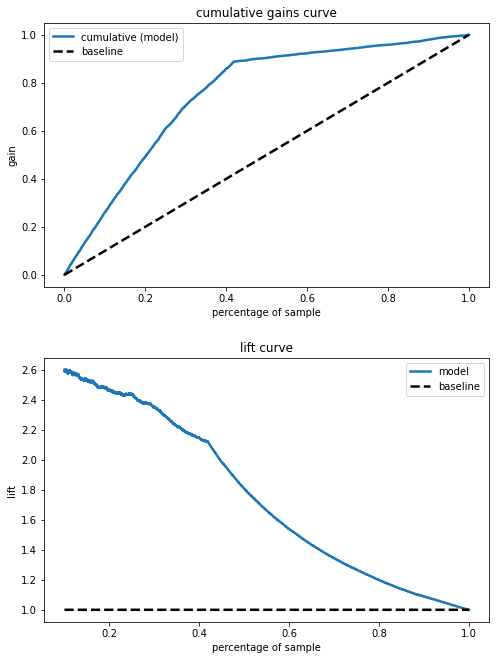

In [32]:
table_knn = cv.gain_lift_curve(yhat_proba, y_val)
metrics_knn, new_table_knn = cv.precision_recall_at_k(table_knn, 12200) #12200 = 40% of customers
new_table_knn.to_pickle(datapath+'processed/knn_table.pkl')

In [26]:
#Table of KNN data
new_table_knn

,0,1,target,correct,propensity_score,cumulative_propensity_score,cumulative_porc_base,lift,ranking,precision_at_k,recall_at_k
0,0.0,1.0,1,yes,0.000268,0.000268,0.000033,8.158683,1,1.000000,0.000268
1,0.0,1.0,0,no,0.000000,0.000268,0.000066,4.079342,2,0.500000,0.000268
2,0.0,1.0,1,yes,0.000268,0.000535,0.000098,5.439122,3,0.666667,0.000535
3,0.0,1.0,0,no,0.000000,0.000535,0.000131,4.079342,4,0.500000,0.000535
4,0.0,1.0,0,no,0.000000,0.000535,0.000164,3.263473,5,0.400000,0.000535
...,...,...,...,...,...,...,...,...,...,...,...
30484,1.0,0.0,0,yes,0.000000,0.999732,0.999869,0.999864,30485,0.122552,0.999732
30485,1.0,0.0,1,no,0.000268,1.000000,0.999902,1.000098,30486,0.122581,1.000000
30486,1.0,0.0,0,yes,0.000000,1.000000,0.999934,1.000066,30487,0.122577,1.000000
30487,1.0,0.0,0,yes,0.000000,1.000000,0.999967,1.000033,30488,0.122573,1.000000


In [27]:
#KNN: Metrics of precision@k and recall@k -> k=12200 (40% of base).
metrics_knn

(0.26295081967213113, 0.8584426010168584)